# Introduction to Machine Learning

We will predict heart disease events based on 11 independent features.

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

Dependent Feature:
- HeartDisease: output class [1: heart disease, 0: Normal]

Data Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

# Package Loading

In [54]:
# Packages
#%% Data Handling
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Model Prep and Model Training
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

## Data Import

In [55]:
heart = pd.read_csv('data/heart.csv')

## Exploratory Data Analysis (EDA)

In [56]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [57]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


c:\Users\bertg\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

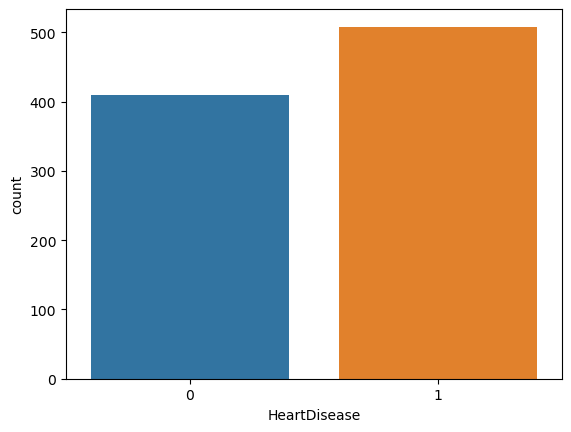

In [58]:
sns.countplot(heart['HeartDisease'])

<AxesSubplot:>

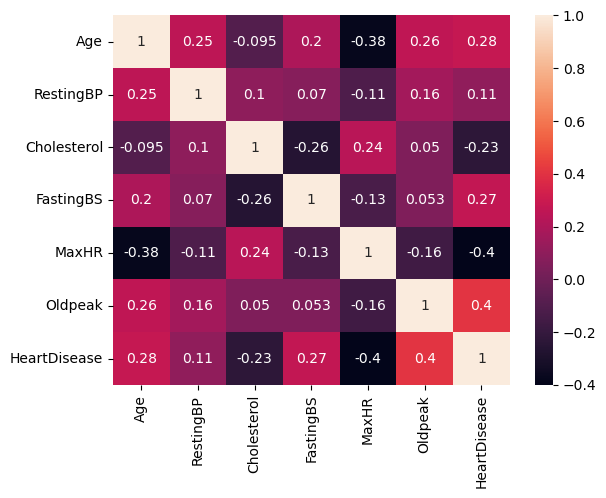

In [59]:
sns.heatmap(heart.corr(), annot=True)

# Data Preparation

Treat Categorical Features

In [60]:
# Categorical Feature Treatment
heart_dummies = pd.get_dummies(heart)

Separate Independent and Dependent Features

In [61]:
X, y = heart_dummies.drop(columns='HeartDisease'), heart_dummies['HeartDisease']

Train / Test Split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Scale the Data

In [63]:
scaler = StandardScaler()
# scale train
X_train_scaled = scaler.fit_transform(X_train)
# apply scaling from train to test
X_test_scaled = scaler.transform(X_test)


# Modeling

Naive Classifier

In [64]:
from collections import Counter
target_cnt = Counter(heart['HeartDisease'])
target_cnt

Counter({0: 410, 1: 508})

In [65]:
naive_accuracy = target_cnt[max(target_cnt)] / len(heart['HeartDisease']) * 100
print(f"Pure Guessing results in an accuracy of {naive_accuracy}.")

Pure Guessing results in an accuracy of 55.33769063180828.


Model Training

In [66]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

create predictions

In [67]:
y_pred_logreg_test = log_reg.predict(X_test_scaled)

Confusion Matrix

<AxesSubplot:>

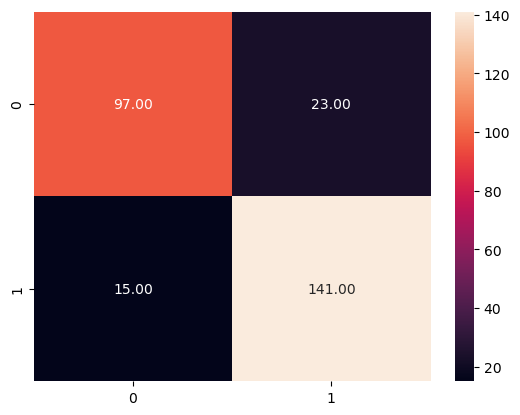

In [68]:
cm = confusion_matrix(y_pred=y_pred_logreg_test, y_true=y_test)
sns.heatmap(cm, annot=True, fmt='.2f')

In [69]:
accuracy_score(y_pred_logreg_test, y_test) * 100

86.23188405797102

## Alternative Algorithms

In [70]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf').fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8731884057971014

In [71]:
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth = 80, subsample = 0.7, learning_rate = 0.01).fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.8659420289855072